# Multiclass classification

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.calibration import CalibratedClassifierCV
from pycalib.models import CalibratedModel
from pycalib.visualisations import plot_reliability_diagram


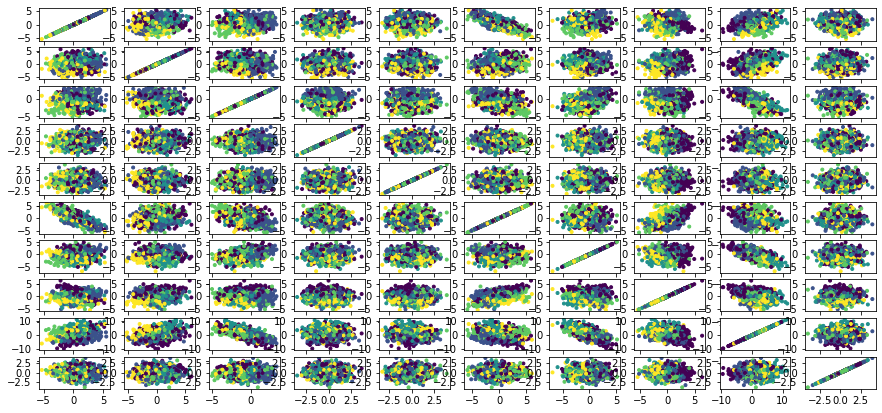

In [2]:
n_features = 10
n_classes = 5
X, y = datasets.make_classification(n_classes=n_classes, n_samples=10000,
                                    n_clusters_per_class=2,
                                    n_features=n_features,
                                    n_informative=int(n_features/2),
                                    n_redundant=int(n_features/4),
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,
                                                    random_state=42)

class_names = ['C{}'.format(i+1) for i in range(n_classes)]

fig = plt.figure(figsize=(15, 7))
for i in range(n_features):
    for j in range(n_features):
        ax = fig.add_subplot(n_features, n_features, 1 + i + j*n_features)
        plt.scatter(X_train[:,i], X_train[:,j], c=y_train, marker='.')

# Reliability diagram

## Question

- TODO add confidence reliability diagram

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1 2 3 4] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retriev

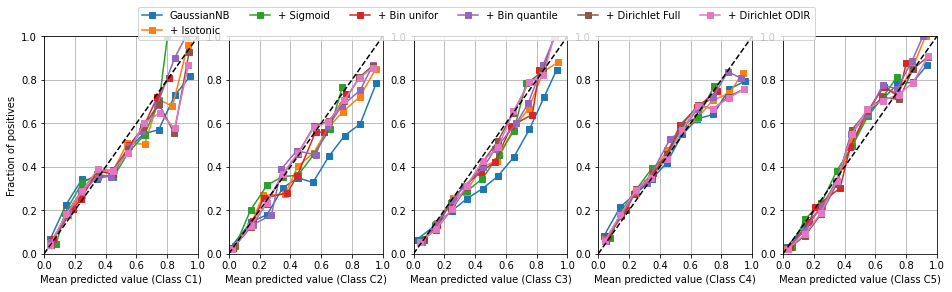

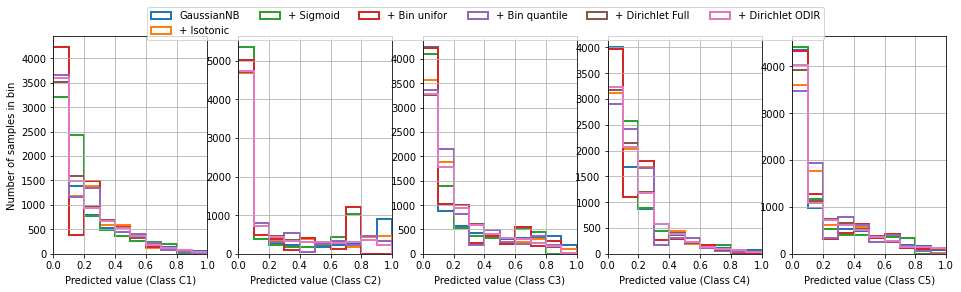

In [3]:
from pycalib.models import IsotonicCalibration, SigmoidCalibration, BinningCalibration
from pycalib.models.multiclass import OneVsRestCalibrator
from dirichletcal.calib.fulldirichlet import FullDirichletCalibrator


estimators = [(GaussianNB(), 'GaussianNB'),
              (CalibratedModel(GaussianNB(), method=OneVsRestCalibrator(IsotonicCalibration())), '+ Isotonic'),
              (CalibratedModel(GaussianNB(), method=OneVsRestCalibrator(SigmoidCalibration())), '+ Sigmoid'),
              (CalibratedModel(GaussianNB(), method=OneVsRestCalibrator(BinningCalibration(strategy='uniform'))), '+ Bin unifor'),
              (CalibratedModel(GaussianNB(), method=OneVsRestCalibrator(BinningCalibration(strategy='quantile'))), '+ Bin quantile'),
              (CalibratedModel(GaussianNB(), method=FullDirichletCalibrator(reg_lambda=1e-3)), '+ Dirichlet Full'),
              (CalibratedModel(GaussianNB(), method=FullDirichletCalibrator(reg_lambda=1e-3, reg_mu=1e-3, reg_norm=True)), '+ Dirichlet ODIR')

             ]

legend = [aux[1] for aux in estimators]
scores = []
for clf, name in estimators:
    clf.fit(X_train, y_train)
    scores.append(clf.predict_proba(X_test))
    
_ = plot_reliability_diagram(y_test, scores, legend=legend, histogram=True, class_names=class_names)

# Calibration map

- A calibration map with more than 3 dmeni

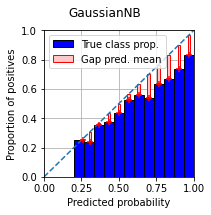

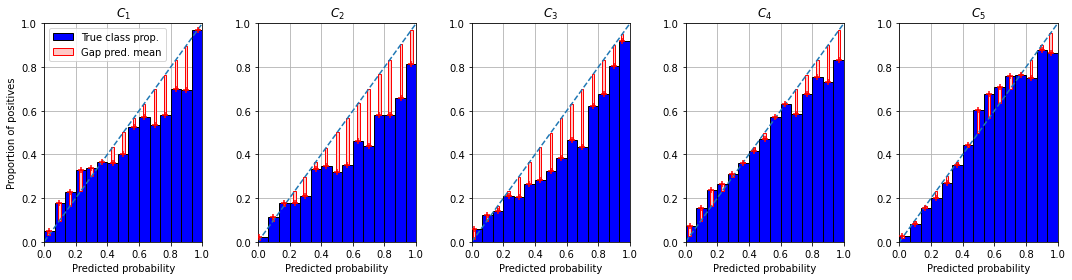

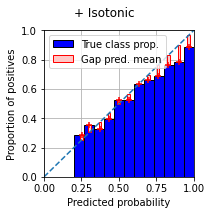

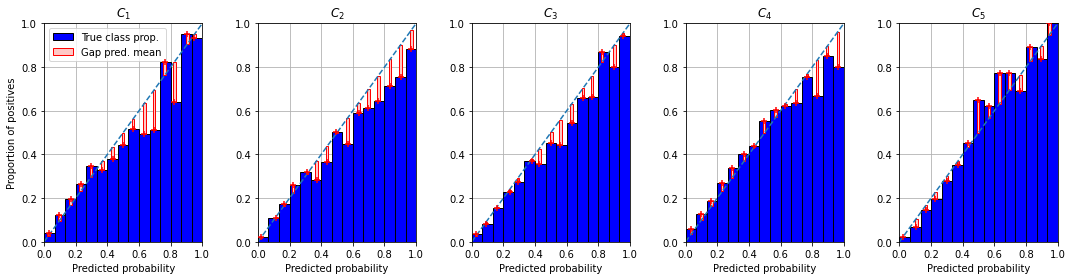

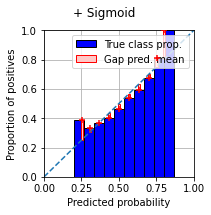

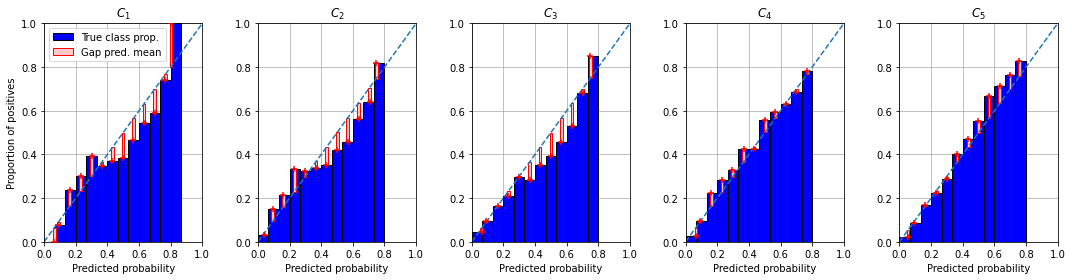

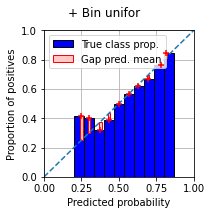

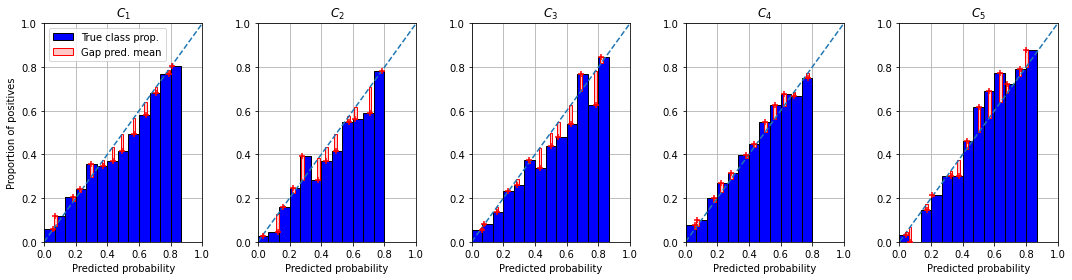

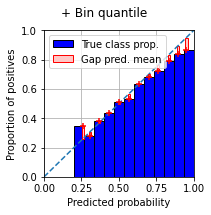

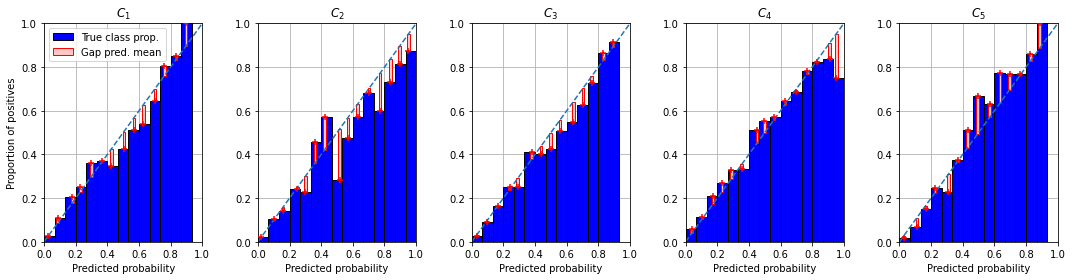

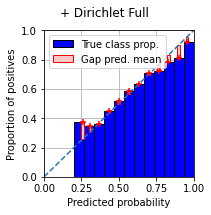

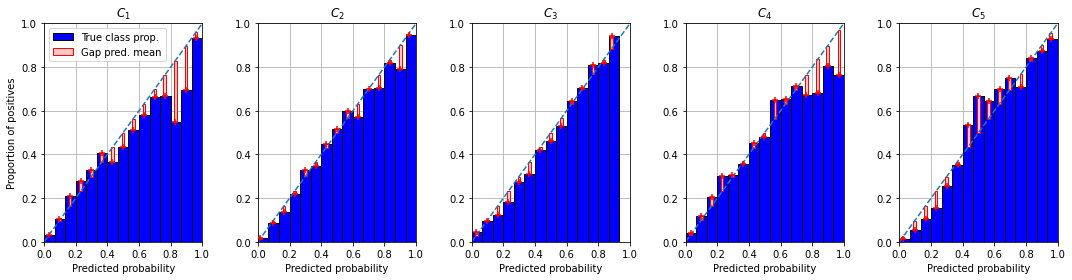

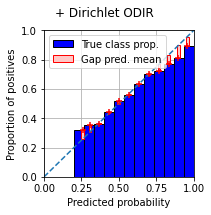

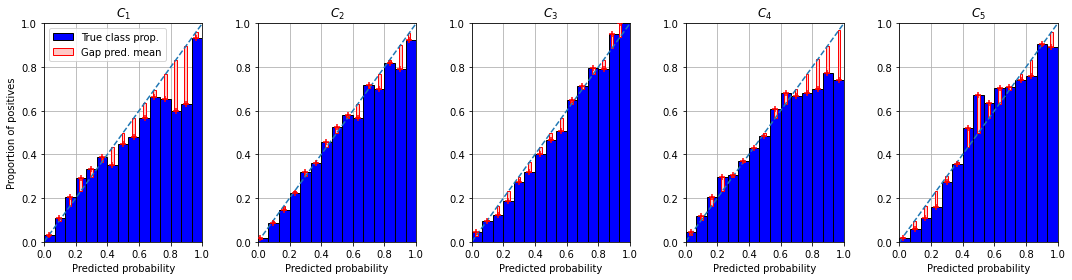

In [4]:
from pycalib.visualisations import plot_multiclass_reliability_diagram_gaps

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto')
Y_test = ohe.fit_transform(y_test.reshape(-1, 1))


# Reliability diagrams
for i, (clf, name) in enumerate(estimators):
    fig = plt.figure(figsize=(3, 3))
    fig.suptitle(name)
    
    probas = clf.predict_proba(X_test)
    plot_multiclass_reliability_diagram_gaps(Y_test, probas, fig=fig, per_class=False)
    
    fig = plt.figure(figsize=(15, 4))
    ax = [fig.add_subplot(1, n_classes, j+1) for j in range(n_classes)]
    plot_multiclass_reliability_diagram_gaps(Y_test, probas, fig=fig, ax=ax, per_class=True)